In [1]:
!pip3 install mplfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplfinance.original_flavor import candlestick2_ohlc
import matplotlib.dates as mpl_date

     |████████████████████████████████| 70 kB 309 kB/s            


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/AnalyzeStocks/master/dataset/Ethereum%20Data/ETH-USD.csv", parse_dates=True)

In [3]:
df = df.drop(columns=["Adj Close"])

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,164329.0
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,674188.0
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,532170.0
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,405283.0
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1463100.0


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,2208.000000,2208.000000,2208.000000,2208.000000,2.208000e+03
mean,433.578981,450.619491,414.840862,434.914512,7.348590e+09
std,683.498443,713.295560,650.311554,685.738356,1.075435e+10
min,0.431589,0.482988,0.420897,0.434829,1.021280e+05
25%,14.167250,14.561175,13.567750,14.260150,4.256840e+07
50%,203.964431,210.450729,196.916908,203.912002,2.290465e+09
75%,408.495575,418.961944,394.578835,409.866516,1.029495e+10
max,4174.635742,4362.350586,3785.848633,4168.701172,8.448291e+10


In [6]:
df['100ma'] = df['Close'].rolling(window = 100, min_periods = 0).mean()
df

,Date,Open,High,Low,Close,Volume,100ma
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,1.643290e+05,2.772120
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,6.741880e+05,1.762723
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,5.321700e+05,1.409114
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,4.052830e+05,1.233947
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.463100e+06,1.200730
...,...,...,...,...,...,...,...
2207,2021-08-22,3226.227295,3272.733154,3142.007080,3242.115479,1.598328e+10,2497.191824
2208,2021-08-23,3241.357422,3373.384277,3235.851318,3319.257324,2.051111e+10,2494.003176
2209,2021-08-24,3324.855469,3358.688232,3154.121338,3172.456299,2.013103e+10,2489.852678
2210,2021-08-25,3174.269775,3248.727295,3086.114990,3224.915283,1.890273e+10,2489.277854


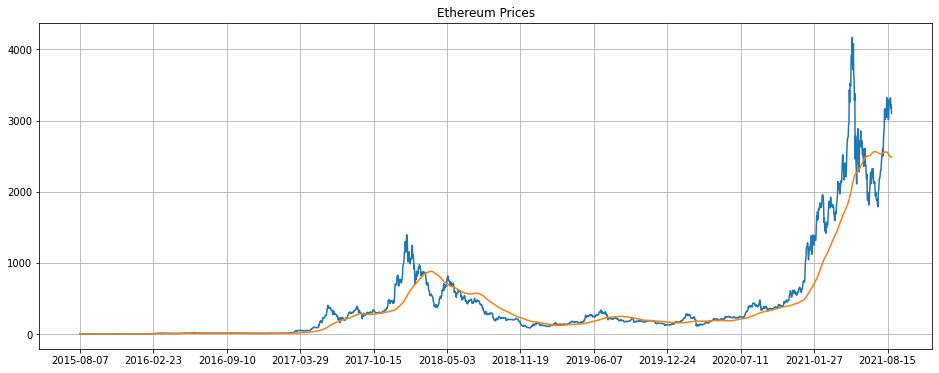

In [7]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df.Close)
ax.plot(df.Date, df['100ma'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Ethereum Prices')
plt.grid()
plt.show()

In [8]:
df["Total Traded"] = df['Open']*df["Volume"]

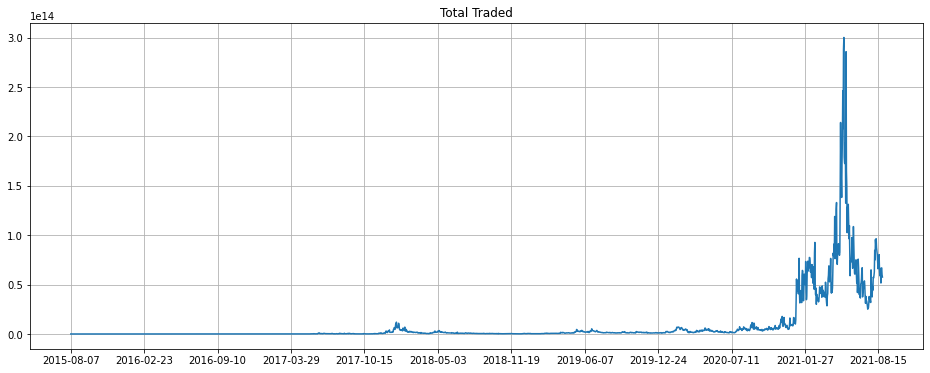

In [9]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df['Total Traded'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Total Traded')
plt.grid()
plt.show()

In [10]:
df.iloc[df['Total Traded'].argmax()]

Date                     2021-05-13
Open                    3828.918457
High                    4032.563477
Low                     3549.407227
Close                   3715.148438
Volume                78398214539.0
100ma                   2140.178688
Total Traded    300180370644222.875
Name: 2106, dtype: object

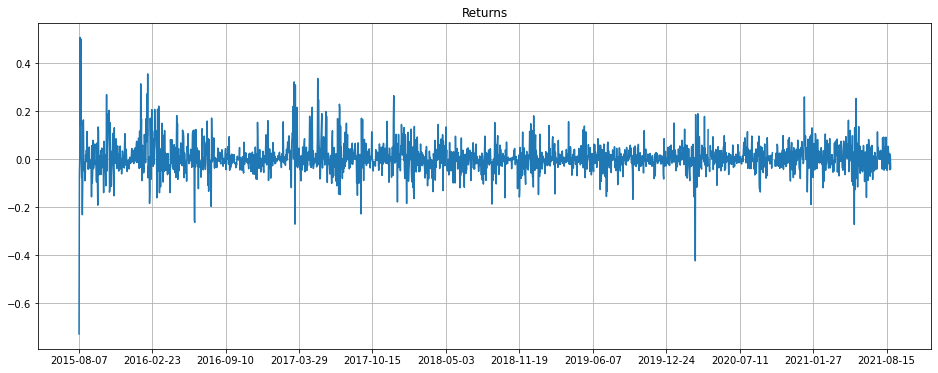

In [11]:
df["returns"] = (df["Close"]/df["Close"].shift(1)) - 1
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df['returns'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Returns')
plt.grid()
plt.show()

<AxesSubplot:>

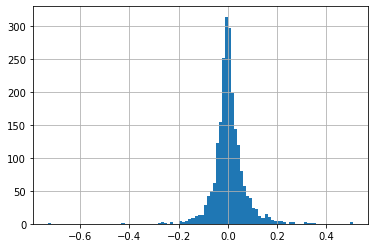

In [12]:
df["returns"].hist(bins=100)

In [13]:
df["returns"].describe()

count    2204.000000
mean        0.005304
std         0.064583
min        -0.728249
25%        -0.023070
50%         0.000797
75%         0.029766
max         0.507323
Name: returns, dtype: float64

<AxesSubplot:>

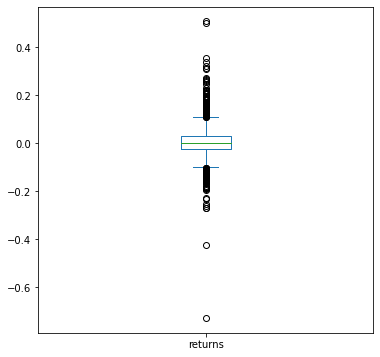

In [14]:
df["returns"].plot(kind = "box", figsize = (6,6))

In [15]:
df["Cumulative Return"] = (1 + df["returns"]).cumprod()
df

,Date,Open,High,Low,Close,Volume,100ma,Total Traded,returns,Cumulative Return
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,1.643290e+05,2.772120,4.653173e+05,NaN,NaN
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,6.741880e+05,1.762723,1.883519e+06,-0.728249,0.271751
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,5.321700e+05,1.409114,3.757844e+05,-0.068268,0.253199
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,4.052830e+05,1.233947,2.893676e+05,0.009333,0.255562
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.463100e+06,1.200730,1.036002e+06,0.507323,0.385214
...,...,...,...,...,...,...,...,...,...,...
2207,2021-08-22,3226.227295,3272.733154,3142.007080,3242.115479,1.598328e+10,2497.191824,5.156569e+13,0.004969,1008.874339
2208,2021-08-23,3241.357422,3373.384277,3235.851318,3319.257324,2.051111e+10,2494.003176,6.648384e+13,0.023794,1032.879168
2209,2021-08-24,3324.855469,3358.688232,3154.121338,3172.456299,2.013103e+10,2489.852678,6.693276e+13,-0.044227,987.197949
2210,2021-08-25,3174.269775,3248.727295,3086.114990,3224.915283,1.890273e+10,2489.277854,6.000236e+13,0.016536,1003.522020


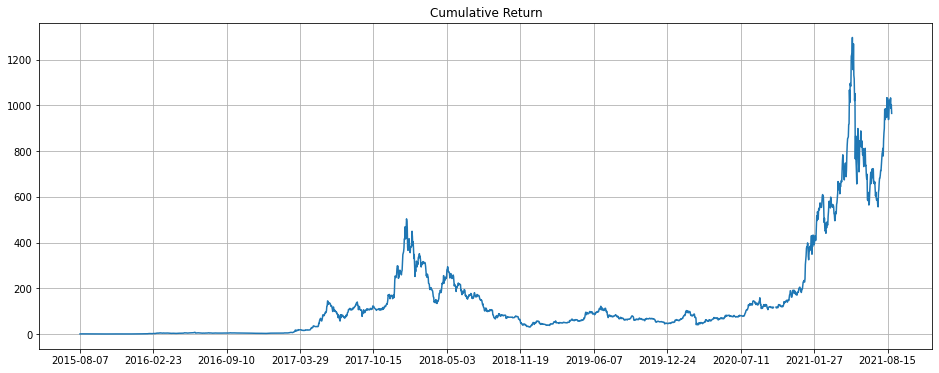

In [16]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df['Cumulative Return'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Cumulative Return')
plt.grid()
plt.show()

In [17]:
df.iloc[df["Cumulative Return"].argmax()]

Date                            2021-05-11
Open                           3948.271973
High                           4178.208984
Low                            3783.889404
Close                          4168.701172
Volume                       52679737865.0
100ma                           2094.01106
Total Traded         207993932557366.34375
returns                           0.054755
Cumulative Return               1297.20723
Name: 2104, dtype: object

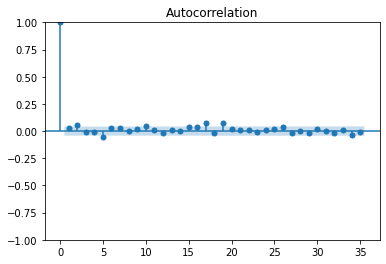

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import register_matplotlib_converters
acf_plot = plot_acf(df.returns.dropna(), lags=35)

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


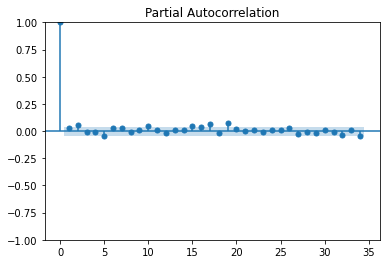

In [19]:
pacf_plot = plot_pacf(df.returns.dropna())